In [1]:
%load_ext autoreload
%autoreload 2

from experiments.all import train_and_evaluate
from tsm.configuration import TSMConfigParser
import docker
import logging

logging.basicConfig(level=logging.INFO)

# load configuration
config = TSMConfigParser()
config.read("/home/pablo/tesis/tsm-pipeline/code/configs/pablo-bestia.cfg")
config.check()
docker_client = docker.from_env()

In [2]:
from scripts.docker import read_dbs_dataset
from numpy.random import RandomState

path_dbs = read_dbs_dataset("/home/pablo/tesis/tsm-pipeline/experiments/datasets/path_1.txt")
# Using a fixed random state to have reproducible results
rand = RandomState(seed=5)

print(len(path_dbs))

336


In [3]:
from random import sample
from sklearn.model_selection import train_test_split

sample_20 = sample(path_dbs, 20)
train, test = train_test_split(sample_20, train_size=.5, shuffle=True, random_state=rand)
print("train %d, test %d" %(len(train), len(test)))

train 10, test 10


corrida de sanity check con path

In [4]:
import tempfile
res_dir = tempfile.mkdtemp()
print("using %s for 20 run" % (res_dir))

train_and_evaluate(
    config=config,
    results_dir=res_dir,
    query_type="path",
    train=train,
    test=test,
    docker_client=docker_client,
)

INFO:experiments.all:train_and_evaluate with train size 10, test size 10
INFO:experiments.all:Running training
INFO:scripts.docker:creating /tmp/tmpitud061x dir. Omitting error if already existing
INFO:scripts.docker:creating /tmp/log dir. Omitting error if already existing


using /tmp/tmpitud061x for 20 run


INFO:scripts.docker:running at container 08e1c9e9f1aee691c61e7140067623b7fa7ed29c21a0991deccc3541a9a3e096. Use `docker logs 08e1c9e9f1aee691c61e7140067623b7fa7ed29c21a0991deccc3541a9a3e096 --tail 10 --follow` to follow progress
INFO:scripts.docker:running combine scores
INFO:misc.combinescores:globbing folder: /tmp/tmpitud061x/*/reprScores.txt
INFO:misc.combinescores:working on 8 reprScores files
INFO:experiments.all:Running worse evaluation
INFO:scripts.evaluate:creating /tmp/tmpitud061x/worse dir. Omitting error if already existing
INFO:scripts.evaluate:Starting processing with 4 processes
INFO:scripts.evaluate:Evaluating tianxiangbing - mobile-select-area
INFO:scripts.evaluate:Evaluating alphagov - webchat-prototype
INFO:scripts.evaluate:Evaluating ckeditor - ckeditor5-dev
INFO:scripts.evaluate:Evaluating Klemek - snex.io
INFO:scripts.evaluate:Evaluating cdaniel - wardleymapstool
INFO:scripts.evaluate:Evaluating apache - couchdb-fauxton
INFO:scripts.evaluate:Evaluating k88hudson - w

,precision,recall,accuracy,alerts to recover (atr),alerts recovered,suprious alerts,projects with atr,avg atr per proj
0,0.0,0.0,0.0,1,0,3,1,1.0


dio pésimo denuevo con pocas dbs, nada como nosql que con poquitas da bien. Probando con 50/50.

In [5]:
sample_100 = sample(path_dbs, 100)
train, test = train_test_split(sample_100, train_size=.5, shuffle=True, random_state=rand)
print("train %d, test %d" %(len(train), len(test)))

train 50, test 50


In [6]:
import tempfile
res_dir = tempfile.mkdtemp()
print("using %s for 100 run" % (res_dir))

train_and_evaluate(
    config=config,
    results_dir=res_dir,
    query_type="path",
    train=train,
    test=test,
    docker_client=docker_client,
)

INFO:experiments.all:train_and_evaluate with train size 50, test size 50
INFO:experiments.all:Running training
INFO:scripts.docker:creating /tmp/tmp2e76gonr dir. Omitting error if already existing
INFO:scripts.docker:creating /tmp/log dir. Omitting error if already existing


using /tmp/tmp2e76gonr for 100 run


INFO:scripts.docker:running at container 833e070e0cf2e3cbfc52736bc88d7cd1cce869f7d528cb45cdc872131c382686. Use `docker logs 833e070e0cf2e3cbfc52736bc88d7cd1cce869f7d528cb45cdc872131c382686 --tail 10 --follow` to follow progress
INFO:scripts.docker:running combine scores
INFO:misc.combinescores:globbing folder: /tmp/tmp2e76gonr/*/reprScores.txt
INFO:misc.combinescores:working on 39 reprScores files
INFO:experiments.all:Running worse evaluation
INFO:scripts.evaluate:creating /tmp/tmp2e76gonr/worse dir. Omitting error if already existing
INFO:scripts.evaluate:Starting processing with 4 processes
INFO:scripts.evaluate:Evaluating mgh3326 - DoItNodeJS
INFO:scripts.evaluate:Evaluating YellowLabTools - YellowLabTools
INFO:scripts.evaluate:Evaluating prebid - prebid-js-build-generator
INFO:scripts.evaluate:Evaluating firephp - firephp-extension
INFO:scripts.evaluate:Evaluating gilbitron - Raneto
INFO:scripts.evaluate:Evaluating linagora - hublin
INFO:scripts.evaluate:Evaluating assaf - zombie
I

,precision,recall,accuracy,alerts to recover (atr),alerts recovered,suprious alerts,projects with atr,avg atr per proj
0,0.010363,0.153846,0.009804,13,2,191,10,1.3


haciendo una prueba de tomar muchos cortes para ver si todos dan mal

In [7]:
from sklearn.model_selection import KFold
import numpy as np

sample_30 = sample(path_dbs, 30)
# fixing random state to make this repeatable
kf = KFold(n_splits=3)
collected_results = []
base_results_dir = "/home/pablo/dev-results/path-30-3fold-"
for i, (train_index, test_index) in enumerate(kf.split(sample_30)):
    print("Fold %d" % (i))
    res_dir = "%s%d" % (base_results_dir, i)
    train_split = np.take(sample_30, train_index)
    test_split = np.take(sample_30, test_index)

    scores = train_and_evaluate(
        config=config,
        results_dir=res_dir,
        query_type="path",
        train=train_split.tolist(),
        test=test_split.tolist(),
        docker_client=docker_client,
    )
    print(scores)
    collected_results.append(scores)
print("done")

INFO:experiments.all:train_and_evaluate with train size 20, test size 10
INFO:experiments.all:Running training
INFO:scripts.docker:creating /home/pablo/dev-results/path-30-3fold-0 dir. Omitting error if already existing
INFO:scripts.docker:creating /tmp/log dir. Omitting error if already existing


Fold 0


INFO:scripts.docker:running at container b600026092940ee8102e4af9fc349f6ad6599bea76b26947c43099a8b09f42cf. Use `docker logs b600026092940ee8102e4af9fc349f6ad6599bea76b26947c43099a8b09f42cf --tail 10 --follow` to follow progress
INFO:scripts.docker:running combine scores
INFO:misc.combinescores:globbing folder: /home/pablo/dev-results/path-30-3fold-0/*/reprScores.txt
INFO:misc.combinescores:working on 17 reprScores files
INFO:experiments.all:Running worse evaluation
INFO:scripts.evaluate:creating /home/pablo/dev-results/path-30-3fold-0/worse dir. Omitting error if already existing
INFO:scripts.evaluate:Starting processing with 4 processes
INFO:scripts.evaluate:Evaluating Binomi0 - crm-backoffice-api
INFO:scripts.evaluate:Evaluating tianxiangbing - mobile-select-area
INFO:scripts.evaluate:Evaluating ministryofjustice - iis
INFO:scripts.evaluate:Evaluating microsoft - azpipelines-kubernetesUI-WebApp
INFO:scripts.evaluate:Evaluating airontsang - up-up
INFO:scripts.evaluate:Evaluating MgBac

   precision  recall  accuracy  alerts to recover (atr)  alerts recovered  \
0   0.018519     1.0  0.018519                        1                 1   

   suprious alerts  projects with atr  avg atr per proj  
0               53                  1               1.0  
Fold 1


INFO:scripts.docker:running at container 80df20a37f57f975d3fc03bad5fe0febb057d6b3ac71933d1842420724df1747. Use `docker logs 80df20a37f57f975d3fc03bad5fe0febb057d6b3ac71933d1842420724df1747 --tail 10 --follow` to follow progress
INFO:scripts.docker:running combine scores
INFO:misc.combinescores:globbing folder: /home/pablo/dev-results/path-30-3fold-1/*/reprScores.txt
INFO:misc.combinescores:working on 16 reprScores files
INFO:experiments.all:Running worse evaluation
INFO:scripts.evaluate:creating /home/pablo/dev-results/path-30-3fold-1/worse dir. Omitting error if already existing
INFO:scripts.evaluate:Starting processing with 4 processes
INFO:scripts.evaluate:Evaluating larrycameron80 - mvp-product
INFO:scripts.evaluate:Evaluating GoogleChromeLabs - ui-element-samples
INFO:scripts.evaluate:Evaluating GoogleChromeLabs - sw-precache
INFO:scripts.evaluate:Evaluating sxfshdf - server-js
INFO:scripts.evaluate:Evaluating simpletut - Universal-React-Apollo-Registration
INFO:scripts.evaluate:E

   precision    recall  accuracy  alerts to recover (atr)  alerts recovered  \
0   0.666667  0.545455  0.428571                       11                 6   

   suprious alerts  projects with atr  avg atr per proj  
0                3                  3          3.666667  
Fold 2


INFO:scripts.docker:running at container 251bdbafc945758446aeb3243c5f8af5e68adf9d3e4d81efef0e40311ee0169b. Use `docker logs 251bdbafc945758446aeb3243c5f8af5e68adf9d3e4d81efef0e40311ee0169b --tail 10 --follow` to follow progress
INFO:scripts.docker:running combine scores
INFO:misc.combinescores:globbing folder: /home/pablo/dev-results/path-30-3fold-2/*/reprScores.txt
INFO:misc.combinescores:working on 17 reprScores files
INFO:experiments.all:Running worse evaluation
INFO:scripts.evaluate:creating /home/pablo/dev-results/path-30-3fold-2/worse dir. Omitting error if already existing
INFO:scripts.evaluate:Starting processing with 4 processes
INFO:scripts.evaluate:Evaluating eleboucher - faceapp-express-example
INFO:scripts.evaluate:Evaluating davglass - yui-local
INFO:scripts.evaluate:Evaluating henszey - etcd-browser
INFO:scripts.evaluate:Evaluating michalbluj - CeasarsOffers
INFO:scripts.evaluate:Evaluating Alfarie - LinkitSmart
INFO:scripts.evaluate:Evaluating FabricLabs - maki
INFO:scr

   precision    recall  accuracy  alerts to recover (atr)  alerts recovered  \
0   0.076923  0.666667  0.074074                        3                 2   

   suprious alerts  projects with atr  avg atr per proj  
0               24                  2               1.5  
done


In [8]:
import pandas as pd

concated_results = pd.concat(collected_results)
pd.concat([concated_results, concated_results.apply(['mean'])])

,precision,recall,accuracy,alerts to recover (atr),alerts recovered,suprious alerts,projects with atr,avg atr per proj
0,0.018519,1.000000,0.018519,1.0,1.0,53.000000,1.0,1.000000
0,0.666667,0.545455,0.428571,11.0,6.0,3.000000,3.0,3.666667
0,0.076923,0.666667,0.074074,3.0,2.0,24.000000,2.0,1.500000
mean,0.254036,0.737374,0.173721,5.0,3.0,26.666667,2.0,2.055556


## generación de resultados para la tesis

sampling 300 databases, and doing 5 fold cross validation

In [22]:
import numpy as np
# sample_300 = rand.choice(path_dbs, size=300)
# with open("path_sample_300.npy", "wb") as f:
#     np.save(f, sample_300)
with open("path_sample_300.npy", "rb") as f:
    sample_300 = np.load(f)
len(sample_300)
base_results_dir = "/home/pablo/dev-results/path-300-5fold-"

In [24]:
from sklearn.model_selection import KFold
# fixing random state to make this repeatable
kf = KFold(n_splits=5)
folds = list(kf.split(sample_300))

In [25]:
for i, (train_index, test_index) in enumerate(folds):
    print(f"fold {i}: |train| = {len(train_index)} - |test| = {len(test_index)}")

fold 0: |train| = 240 - |test| = 60
fold 1: |train| = 240 - |test| = 60
fold 2: |train| = 240 - |test| = 60
fold 3: |train| = 240 - |test| = 60
fold 4: |train| = 240 - |test| = 60


In [6]:
collected_results = []
for i, (train_index, test_index) in enumerate(folds):
    try:
        print("Fold %d" % (i))
        res_dir = "%s%d" % (base_results_dir, i)
        train_split = np.take(sample_300, train_index)
        test_split = np.take(sample_300, test_index)

        scores = train_and_evaluate(
            config=config,
            results_dir=res_dir,
            query_type="path",
            train=train_split.tolist(),
            test=test_split.tolist(),
            docker_client=docker_client,
        )
        print(scores)
        collected_results.append(scores)
    except Exception as e:
        print(f'fold {i} failed fatally. Please retry!')
        print(e)
        continue
print("done")

[INFO	2023-07-10 18:11:23,879] experiments.all	train_and_evaluate with train size 240, test size 60
[INFO	2023-07-10 18:11:23,880] experiments.all	Running training
[INFO	2023-07-10 18:11:23,880] scripts.docker	creating /home/pablo/dev-results/path-300-5fold-0 dir. Omitting error if already existing
[INFO	2023-07-10 18:11:23,880] scripts.docker	creating /tmp/log dir. Omitting error if already existing


Fold 0


[INFO	2023-07-10 18:11:24,154] scripts.docker	running at container 97a6b06da691cebc6998f96588f9db3a979a8827d9d9ed5b25638d5843694ac7. Use `docker logs 97a6b06da691cebc6998f96588f9db3a979a8827d9d9ed5b25638d5843694ac7 --tail 10 --follow` to follow progress
[INFO	2023-07-10 20:01:41,827] scripts.docker	running combine scores
[INFO	2023-07-10 20:01:41,830] misc.combinescores	globbing folder: /home/pablo/dev-results/path-300-5fold-0/*/reprScores.txt
[INFO	2023-07-10 20:01:41,840] misc.combinescores	working on 147 reprScores files
[INFO	2023-07-10 20:01:41,867] experiments.all	Running worse evaluation
[INFO	2023-07-10 20:01:41,867] scripts.evaluate	creating /home/pablo/dev-results/path-300-5fold-0/worse dir. Omitting error if already existing
[INFO	2023-07-10 20:01:42,051] scripts.evaluate	Starting processing with 4 processes
[INFO	2023-07-10 20:01:42,069] scripts.evaluate	Evaluating creationix - creationix
[INFO	2023-07-10 20:01:42,069] scripts.evaluate	Evaluating LarmuseauNiels - WeighAncho

   precision    recall  accuracy  alerts to recover (atr)  alerts recovered  \
0   0.068433  0.659574  0.066098                       47                31   

   suprious alerts  projects with atr  avg atr per proj  
0              422                 13          3.615385  
Fold 1


[INFO	2023-07-10 20:07:35,166] scripts.docker	running at container 98b71d243da20460e54a803550c50f3e91f1c3b580459df72ec4f9d7152de174. Use `docker logs 98b71d243da20460e54a803550c50f3e91f1c3b580459df72ec4f9d7152de174 --tail 10 --follow` to follow progress
[INFO	2023-07-10 22:21:20,077] scripts.docker	running combine scores
[INFO	2023-07-10 22:21:20,078] misc.combinescores	globbing folder: /home/pablo/dev-results/path-300-5fold-1/*/reprScores.txt
[INFO	2023-07-10 22:21:20,088] misc.combinescores	working on 150 reprScores files
[INFO	2023-07-10 22:21:20,117] experiments.all	Running worse evaluation
[INFO	2023-07-10 22:21:20,117] scripts.evaluate	creating /home/pablo/dev-results/path-300-5fold-1/worse dir. Omitting error if already existing
[INFO	2023-07-10 22:21:20,302] scripts.evaluate	Starting processing with 4 processes
[INFO	2023-07-10 22:21:20,320] scripts.evaluate	Evaluating gotwarlost - istanbul-middleware
[INFO	2023-07-10 22:21:20,320] scripts.evaluate	Evaluating dash1291 - commonp

   precision    recall  accuracy  alerts to recover (atr)  alerts recovered  \
0   0.036437  0.321429  0.033835                       28                 9   

   suprious alerts  projects with atr  avg atr per proj  
0              238                 11          2.545455  
Fold 2


[INFO	2023-07-10 22:24:45,652] scripts.docker	running at container 3d6d3fe510fd9927ea5a614d9cf835971f8539b84f0b7e5a23594f048fb159b3. Use `docker logs 3d6d3fe510fd9927ea5a614d9cf835971f8539b84f0b7e5a23594f048fb159b3 --tail 10 --follow` to follow progress
[INFO	2023-07-11 00:38:24,844] scripts.docker	running combine scores
[INFO	2023-07-11 00:38:24,845] misc.combinescores	globbing folder: /home/pablo/dev-results/path-300-5fold-2/*/reprScores.txt
[INFO	2023-07-11 00:38:24,854] misc.combinescores	working on 153 reprScores files
[INFO	2023-07-11 00:38:24,878] experiments.all	Running worse evaluation
[INFO	2023-07-11 00:38:24,878] scripts.evaluate	creating /home/pablo/dev-results/path-300-5fold-2/worse dir. Omitting error if already existing
[INFO	2023-07-11 00:38:25,080] scripts.evaluate	Starting processing with 4 processes
[INFO	2023-07-11 00:38:25,099] scripts.evaluate	Evaluating FabricLabs - maki
[INFO	2023-07-11 00:38:25,099] scripts.evaluate	Evaluating hugomrdias - iso-stream-http
[INF

   precision    recall  accuracy  alerts to recover (atr)  alerts recovered  \
0    0.08805  0.636364  0.083832                       22                14   

   suprious alerts  projects with atr  avg atr per proj  
0              145                 14          1.571429  
Fold 3


[INFO	2023-07-11 00:41:51,400] scripts.docker	running at container 0d94afbdb893dfc954d9eb6680cd38521984091cbc6b08b0e43d1457b3278155. Use `docker logs 0d94afbdb893dfc954d9eb6680cd38521984091cbc6b08b0e43d1457b3278155 --tail 10 --follow` to follow progress
[INFO	2023-07-11 02:34:13,822] scripts.docker	running combine scores
[INFO	2023-07-11 02:34:13,823] misc.combinescores	globbing folder: /home/pablo/dev-results/path-300-5fold-3/*/reprScores.txt
[INFO	2023-07-11 02:34:13,828] misc.combinescores	working on 152 reprScores files
[INFO	2023-07-11 02:34:13,851] experiments.all	Running worse evaluation
[INFO	2023-07-11 02:34:13,851] scripts.evaluate	creating /home/pablo/dev-results/path-300-5fold-3/worse dir. Omitting error if already existing
[INFO	2023-07-11 02:34:14,044] scripts.evaluate	Starting processing with 4 processes
[INFO	2023-07-11 02:34:14,061] scripts.evaluate	Evaluating FurutaTakuto - infoVis2017
[INFO	2023-07-11 02:34:14,061] scripts.evaluate	Evaluating apache - couchdb-fauxton

   precision  recall  accuracy  alerts to recover (atr)  alerts recovered  \
0   0.018041     0.7  0.017903                       10                 7   

   suprious alerts  projects with atr  avg atr per proj  
0              381                  9          1.111111  
Fold 4


[INFO	2023-07-11 03:12:55,432] scripts.docker	running at container 83f727a7bb4b8fc008f33660686ce0906ca6c0e99577e2fb6401aeef9cfde1c5. Use `docker logs 83f727a7bb4b8fc008f33660686ce0906ca6c0e99577e2fb6401aeef9cfde1c5 --tail 10 --follow` to follow progress
[INFO	2023-07-11 05:14:55,595] scripts.docker	running combine scores
[INFO	2023-07-11 05:14:55,596] misc.combinescores	globbing folder: /home/pablo/dev-results/path-300-5fold-4/*/reprScores.txt
[INFO	2023-07-11 05:14:55,605] misc.combinescores	working on 146 reprScores files
[INFO	2023-07-11 05:14:55,633] experiments.all	Running worse evaluation
[INFO	2023-07-11 05:14:55,633] scripts.evaluate	creating /home/pablo/dev-results/path-300-5fold-4/worse dir. Omitting error if already existing
[INFO	2023-07-11 05:14:55,818] scripts.evaluate	Starting processing with 4 processes
[INFO	2023-07-11 05:14:55,837] scripts.evaluate	Evaluating MgBacon - sharex-node-upload-server
[INFO	2023-07-11 05:14:55,838] scripts.evaluate	Evaluating arguseyes - arg

   precision  recall  accuracy  alerts to recover (atr)  alerts recovered  \
0    0.03886    0.75  0.038363                       20                15   

   suprious alerts  projects with atr  avg atr per proj  
0              371                 12          1.666667  
done


In [13]:
from typing import Tuple
def predictions_info(path) -> Tuple[int]:
    df = pd.read_csv(path, names=["repr", "role", "score"])
    return df[df.role == "snk"].shape[0]

In [20]:
import pandas as pd
from scripts.calculate_scores import calculate_scores_df
from os.path import join as path_join

collected_results = []
for i in range(5):
    results_dir_i = "%s%d" % (base_results_dir, i)
    df = calculate_scores_df(results_dir_i, cleanup_base_dir="tmp")
    sinks_predicted = predictions_info(path_join(results_dir_i, "averaged-results.csv"))
    df["predicted sinks"] = [sinks_predicted]
    collected_results.append(df)


concated_results = pd.concat(collected_results)
concated_results = pd.concat([concated_results, concated_results.apply(['mean'])])
concated_results['name'] = [f'fold {i}' for i in range(5)] + ['mean']

# renames
concated_results = concated_results.rename({
    "alerts to recover (atr)": "atr",
    "alerts recovered": "recovered",
    "suprious alerts": "spurious",
    "projects with atr": "progwithatr",
    "avg atr per proj": "avgatr",
    "predicted sinks": "predsinks"
}, axis=1).astype({
    "atr": "int",
    "recovered": "int",
    "spurious": "int",
    "progwithatr": "int",
    "predsinks": "int"
})

concated_results

,precision,recall,accuracy,atr,recovered,spurious,progwithatr,avgatr,predsinks,name
0,0.068433,0.659574,0.066098,47,31,422,13,3.615385,236,fold 0
0,0.036437,0.321429,0.033835,28,9,238,11,2.545455,385,fold 1
0,0.088050,0.636364,0.083832,22,14,145,14,1.571429,397,fold 2
0,0.018041,0.700000,0.017903,10,7,381,9,1.111111,385,fold 3
0,0.038860,0.750000,0.038363,20,15,371,12,1.666667,381,fold 4
mean,0.049964,0.613473,0.048006,25,15,311,11,2.102009,356,mean


In [21]:
with open("path_300_results.csv", "w") as f:
    concated_results.to_csv(f, float_format='%.4f')

analizando scores

array([[<Axes: title={'center': 'score'}>]], dtype=object)

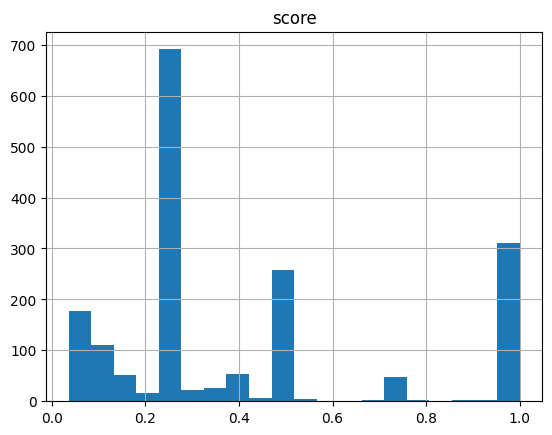

In [28]:
scores_dfs = []
for i in range(5):
    results_dir_i = "%s%d" % (base_results_dir, i)
    df = pd.read_csv(path_join(results_dir_i, "averaged-results.csv"), names=["repr", "rol", "score"])
    scores_dfs.append(df)
pd.concat(scores_dfs).hist(column="score", bins=20)

In [29]:
calculate_scores_df("/home/pablo/dev-results/nosql-rerun-200-5fold-0")

,precision,recall,accuracy,alerts to recover (atr),alerts recovered,suprious alerts,projects with atr,avg atr per proj
0,0.074275,0.353448,0.065391,116,41,511,20,5.8


## Corrida para tesis, 5fold cross, todos las dbs

In [3]:
len(path_dbs)

336

In [4]:
from sklearn.model_selection import KFold

# fixing random state to make this repeatable
kf = KFold(n_splits=5)
splits = list(kf.split(path_dbs)) # usando todas!

import pickle

with open("path_todas_splits.p", "wb") as f:
    pickle.dump(splits, f)

In [5]:
for i, fold in enumerate(splits):
    print("fold %d: TRAIN %d - TEST %d" % (i, len(fold[0]), len(fold[1])))
    # print(fold)

fold 0: TRAIN 268 - TEST 68
fold 1: TRAIN 269 - TEST 67
fold 2: TRAIN 269 - TEST 67
fold 3: TRAIN 269 - TEST 67
fold 4: TRAIN 269 - TEST 67


In [7]:
import numpy as np
base_results_dir = "/home/pablo/dev-results/path-todas-5fold-"
for i, (train_index, test_index) in enumerate(splits):
    print("Fold %d" % (i))
    res_dir = "%s%d" % (base_results_dir, i)
    train_split = np.take(path_dbs, train_index)
    test_split = np.take(path_dbs, test_index)

    scores = train_and_evaluate(
        config=config,
        results_dir=res_dir,
        query_type="path",
        train=train_split.tolist(),
        test=test_split.tolist(),
        docker_client=docker_client,
    )
    print(scores)
print("done")

[INFO	2023-07-29 22:01:52,184] experiments.all	train_and_evaluate with train size 268, test size 68
[INFO	2023-07-29 22:01:52,185] experiments.all	Running training
[INFO	2023-07-29 22:01:52,185] scripts.docker	creating /home/pablo/dev-results/path-todas-5fold-0 dir. Omitting error if already existing
[INFO	2023-07-29 22:01:52,186] scripts.docker	creating /tmp/log dir. Omitting error if already existing


Fold 0


[INFO	2023-07-29 22:01:52,526] scripts.docker	running at container 96dd68a612c39bb6f0b22bf0337f55701efc5ea910fe35335eb24482506013eb. Use `docker logs 96dd68a612c39bb6f0b22bf0337f55701efc5ea910fe35335eb24482506013eb --tail 10 --follow` to follow progress
[INFO	2023-07-30 00:12:52,950] scripts.docker	running combine scores
[INFO	2023-07-30 00:12:52,951] misc.combinescores	globbing folder: /home/pablo/dev-results/path-todas-5fold-0/*/reprScores.txt
[INFO	2023-07-30 00:12:52,961] misc.combinescores	working on 227 reprScores files
[INFO	2023-07-30 00:12:53,003] experiments.all	Running worse evaluation
[INFO	2023-07-30 00:12:53,003] scripts.evaluate	creating /home/pablo/dev-results/path-todas-5fold-0/worse dir. Omitting error if already existing
[INFO	2023-07-30 00:12:53,218] scripts.evaluate	Starting processing with 4 processes
[INFO	2023-07-30 00:12:53,234] scripts.evaluate	Evaluating ASCOT - dashboardjs
[INFO	2023-07-30 00:12:53,234] scripts.evaluate	Evaluating 18F - share
[INFO	2023-07-3

   precision    recall  accuracy  alerts to recover (atr)  alerts recovered  \
0   0.073491  0.717949  0.071429                       39                28   

   suprious alerts  projects with atr  avg atr per proj  
0              353                 10               3.9  
Fold 1


[INFO	2023-07-30 00:54:39,237] scripts.docker	running at container de5f00dddc799d2be9fa1586cc0514f2d8e50f620d143b18a8bec9bd309756c4. Use `docker logs de5f00dddc799d2be9fa1586cc0514f2d8e50f620d143b18a8bec9bd309756c4 --tail 10 --follow` to follow progress
[INFO	2023-07-30 03:42:11,012] scripts.docker	running combine scores
[INFO	2023-07-30 03:42:11,013] misc.combinescores	globbing folder: /home/pablo/dev-results/path-todas-5fold-1/*/reprScores.txt
[INFO	2023-07-30 03:42:11,021] misc.combinescores	working on 220 reprScores files
[INFO	2023-07-30 03:42:11,061] experiments.all	Running worse evaluation
[INFO	2023-07-30 03:42:11,061] scripts.evaluate	creating /home/pablo/dev-results/path-todas-5fold-1/worse dir. Omitting error if already existing
[INFO	2023-07-30 03:42:11,265] scripts.evaluate	Starting processing with 4 processes
[INFO	2023-07-30 03:42:11,283] scripts.evaluate	Evaluating alphagov - submit-prototype-kit
[INFO	2023-07-30 03:42:11,283] scripts.evaluate	Evaluating alphagov - open

   precision    recall  accuracy  alerts to recover (atr)  alerts recovered  \
0   0.088949  0.647059  0.084833                       51                33   

   suprious alerts  projects with atr  avg atr per proj  
0              338                 20              2.55  
Fold 2


[INFO	2023-07-30 03:46:25,481] scripts.docker	running at container 04a5b289bc4f3436608b9fadcc46b60c2a9c71abecea1dd6d9f9ac66a2876945. Use `docker logs 04a5b289bc4f3436608b9fadcc46b60c2a9c71abecea1dd6d9f9ac66a2876945 --tail 10 --follow` to follow progress
[INFO	2023-07-30 06:27:42,515] scripts.docker	running combine scores
[INFO	2023-07-30 06:27:42,527] misc.combinescores	globbing folder: /home/pablo/dev-results/path-todas-5fold-2/*/reprScores.txt
[INFO	2023-07-30 06:27:42,537] misc.combinescores	working on 225 reprScores files
[INFO	2023-07-30 06:27:42,588] experiments.all	Running worse evaluation
[INFO	2023-07-30 06:27:42,589] scripts.evaluate	creating /home/pablo/dev-results/path-todas-5fold-2/worse dir. Omitting error if already existing
[INFO	2023-07-30 06:27:42,799] scripts.evaluate	Starting processing with 4 processes
[INFO	2023-07-30 06:27:42,827] scripts.evaluate	Evaluating firebug - firebug-lite
[INFO	2023-07-30 06:27:42,832] scripts.evaluate	Evaluating facebook - react
[INFO	2

   precision    recall  accuracy  alerts to recover (atr)  alerts recovered  \
0   0.054507  0.722222  0.053388                       36                26   

   suprious alerts  projects with atr  avg atr per proj  
0              451                 15               2.4  
Fold 3


[INFO	2023-07-30 06:32:16,435] scripts.docker	running at container 04c7ac49982c3ef0045a6ccfe5bcb83299a81e1e0be949304af9de1113fd15f3. Use `docker logs 04c7ac49982c3ef0045a6ccfe5bcb83299a81e1e0be949304af9de1113fd15f3 --tail 10 --follow` to follow progress
[INFO	2023-07-30 08:48:38,420] scripts.docker	running combine scores
[INFO	2023-07-30 08:48:38,421] misc.combinescores	globbing folder: /home/pablo/dev-results/path-todas-5fold-3/*/reprScores.txt
[INFO	2023-07-30 08:48:38,427] misc.combinescores	working on 219 reprScores files
[INFO	2023-07-30 08:48:38,468] experiments.all	Running worse evaluation
[INFO	2023-07-30 08:48:38,469] scripts.evaluate	creating /home/pablo/dev-results/path-todas-5fold-3/worse dir. Omitting error if already existing
[INFO	2023-07-30 08:48:38,660] scripts.evaluate	Starting processing with 4 processes
[INFO	2023-07-30 08:48:38,679] scripts.evaluate	Evaluating leizongmin - node-doc-cn
[INFO	2023-07-30 08:48:38,678] scripts.evaluate	Evaluating johntreacy - adafruit-

   precision    recall  accuracy  alerts to recover (atr)  alerts recovered  \
0   0.008899  0.666667  0.008859                       12                 8   

   suprious alerts  projects with atr  avg atr per proj  
0              891                 10               1.2  
Fold 4


[INFO	2023-07-30 08:57:25,025] scripts.docker	running at container c26f6040181fd217c29cbf7e6baac347b470151e476f194f3eb55defe11fdbb9. Use `docker logs c26f6040181fd217c29cbf7e6baac347b470151e476f194f3eb55defe11fdbb9 --tail 10 --follow` to follow progress
[INFO	2023-07-30 11:40:53,249] scripts.docker	running combine scores
[INFO	2023-07-30 11:40:53,250] misc.combinescores	globbing folder: /home/pablo/dev-results/path-todas-5fold-4/*/reprScores.txt
[INFO	2023-07-30 11:40:53,266] misc.combinescores	working on 219 reprScores files
[INFO	2023-07-30 11:40:53,313] experiments.all	Running worse evaluation
[INFO	2023-07-30 11:40:53,313] scripts.evaluate	creating /home/pablo/dev-results/path-todas-5fold-4/worse dir. Omitting error if already existing
[INFO	2023-07-30 11:40:53,517] scripts.evaluate	Starting processing with 4 processes
[INFO	2023-07-30 11:40:53,541] scripts.evaluate	Evaluating scripting - river4
[INFO	2023-07-30 11:40:53,540] scripts.evaluate	Evaluating rcos - observatory-server
[I

   precision    recall  accuracy  alerts to recover (atr)  alerts recovered  \
0   0.037647  0.592593  0.036697                       27                16   

   suprious alerts  projects with atr  avg atr per proj  
0              409                 13          2.076923  
done


In [9]:
from scripts.calculate_scores import calculate_many_scores

results = calculate_many_scores(["/home/pablo/dev-results/path-todas-5fold-%d" % i for i in range(5)])
results
with open("path_todas_results.csv", "w") as f:
    results.to_csv(f, float_format='%.4f')